# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

In [106]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Start coding here...
drug_safety.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [107]:
drug_safety.info

<bound method DataFrame.info of        age   sex      trx  week  wbc  rbc adverse_effects  num_effects
0       62  male     Drug     0  7.3  5.1              No            0
1       62  male     Drug     1  NaN  NaN              No            0
2       62  male     Drug    12  5.6  5.0              No            0
3       62  male     Drug    16  NaN  NaN              No            0
4       62  male     Drug     2  6.6  5.1              No            0
...    ...   ...      ...   ...  ...  ...             ...          ...
16098   78  male  Placebo    16  NaN  NaN             Yes            1
16099   78  male  Placebo     2  7.5  4.9              No            0
16100   78  male  Placebo    20  NaN  NaN             Yes            1
16101   78  male  Placebo     4  6.4  4.8              No            0
16102   78  male  Placebo     8  7.8  4.8              No            0

[16103 rows x 8 columns]>

In [108]:
drug_safety.describe()

,age,week,wbc,rbc,num_effects
count,16103.000000,16103.00000,9128.000000,9127.000000,16103.000000
mean,64.117556,7.74098,7.340557,4.672784,0.101596
std,8.783207,6.94350,1.996652,0.458520,0.323181
min,39.000000,0.00000,1.800000,2.100000,0.000000
25%,58.000000,1.00000,6.000000,4.400000,0.000000
50%,65.000000,4.00000,7.100000,4.700000,0.000000
75%,71.000000,12.00000,8.400000,5.000000,0.000000
max,84.000000,20.00000,26.500000,7.600000,3.000000


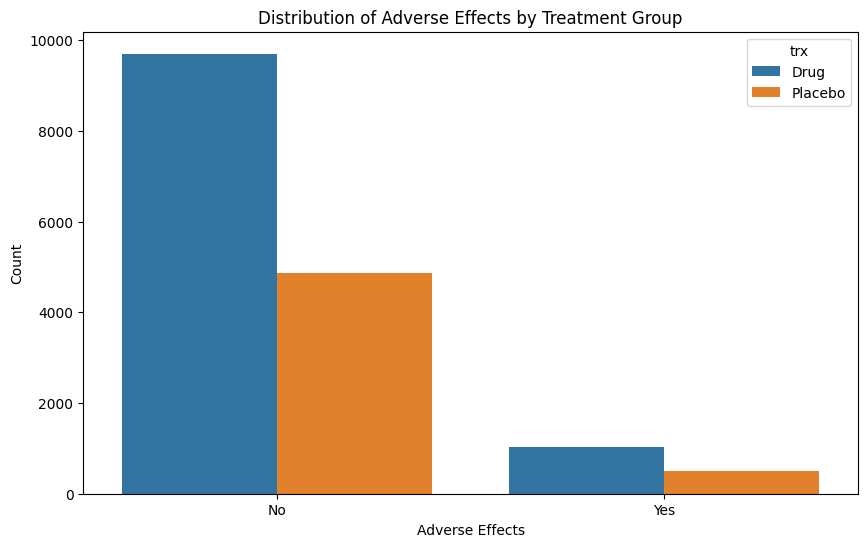

In [109]:
# Exploring the distribution of adverse effects by treatment group
plt.figure(figsize=(10, 6))
sns.countplot(x='adverse_effects', hue='trx', data=drug_safety)
plt.title('Distribution of Adverse Effects by Treatment Group')
plt.xlabel('Adverse Effects')
plt.ylabel('Count')
plt.show()

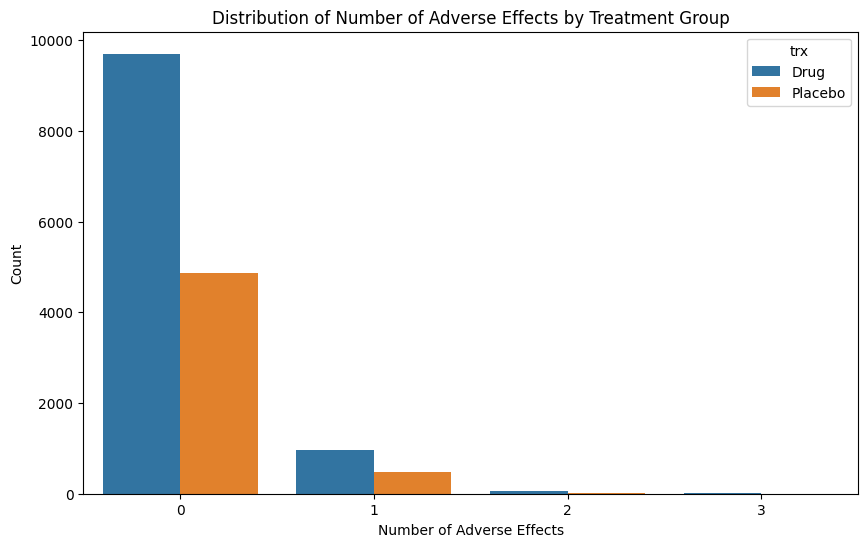

In [110]:
# Exploring the distribution of the number of adverse effects by treatment group
plt.figure(figsize=(10, 6))
sns.countplot(x='num_effects', hue='trx', data=drug_safety)
plt.title('Distribution of Number of Adverse Effects by Treatment Group')
plt.xlabel('Number of Adverse Effects')
plt.ylabel('Count')
plt.show()

# **QUESTION 1:** 
Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups, saving the p-value as a variable called **two_sample_p_value**.

A matrix of contingency serves as a table that systematically organizes data into intersecting categories, providing a visual representation of the combined distribution of two categorical variables. It proves particularly valuable when exploring the interrelation between two qualitative factors and investigating how the frequencies within these categories coincide.

In this tabular representation, each cell encapsulates the count of observations falling into specific combinations of variable categories. The contingency matrix finds widespread utility in statistical analyses, notably in examinations of independence and association between categorical variables. A common application is the chi-square test, which assesses whether two categorical variables exhibit independence or manifest a statistically significant association.

In [111]:
# Creating a contingency table
contingency_table = pd.crosstab(drug_safety['trx'], drug_safety['adverse_effects'])

In [112]:
contingency_table

adverse_effects,No,Yes
trx,,
Drug,9703,1024
Placebo,4864,512



Executing a z-test for proportions becomes valuable when there's a need to compare the proportions of two samples and discern whether the observed difference holds statistical significance. This testing approach is commonly employed when dealing with binary or categorical variables, especially when the goal is to evaluate whether the proportions of these categories exhibit a significant discrepancy between two distinct groups.

In [113]:
# Executing a z proportion test
two_sample_proportions_test = sm.stats.proportions_ztest(contingency_table.iloc[:, 1], contingency_table.sum(axis=1))

In [114]:
# Printing result just to check it
two_sample_proportions_test

(0.0452182684494942, 0.9639333330262475)

In [115]:
# Extracting the p-value from the result
two_sample_p_value = two_sample_proportions_test[1]

In [116]:
# Printing the p-value as requested
print(f"The proportion of adverse effects difference between Drug & Place groups with p-value is:{two_sample_p_value}")

The proportion of adverse effects difference between Drug & Place groups with p-value is:0.9639333330262475


## Conclusions:
A high p-value as 0,96 suggests that there's not enough statisticals evidence to reject the null hypothesis that the proportions are equials. For this reason, the observed difference may be due to chance, and there's no significant difference between the groups in terms of proportion of adverse effects with Placebo or Drugs.

# Question 2:
Find out if the number of adverse effects is independent of the treatment and control groups, saving as a variable called **num_effects_p_value** containing a p-value.

Well, to determine if the number of adverse affects is independent of the treatment and control groups. We can use the "CHI-SQUARE" test 

In [117]:
# Creating a contingency table between 'trx' (aka treatment) and 'num_effects' (number of adverse effects )
contingency_table_num_effects = pd.crosstab(drug_safety['trx'], drug_safety['num_effects'])

In [118]:
# Checking the results of the table
contingency_table_num_effects

num_effects,0,1,2,3
trx,,,,
Drug,9703,956,63,5
Placebo,4864,486,25,1


In [119]:
# Executing the CHI-Square tests
chi2, num_effects_p_value, _, _ = chi2_contingency(contingency_table_num_effects)

In [120]:
# Checking the results
print(f"P-value of the independent number of adverse effects from treatments and control groups:{num_effects_p_value}")

P-value of the independent number of adverse effects from treatments and control groups:0.6150123339426765


## **Conclusions:**

With a p-value of 0,6 -> as this case did not choose the significance level we are going to use 0,05 as the pattern in literature. In this case, there's not enough statistical evidence to reject the null hypothesis. So, we cannot assert a significant association between the number of adverse effects and the treatment control groups.

In other words: this implies that, we can concluded with the simple statistical tests that there's not indication of type of treatment (Drug or Placebo) is linked to a distinct number of adverse effects. 

# **Question 3:**

Examine if there is a significant difference between the ages of the Drug and Placebo groups, storing the p-value of your test in a variable called **age_group_effects_p_value**.

In [121]:
# Extracting the age of the drugs group
age_drug = drug_safety[drug_safety['trx'] == 'Drug']['age']
age_drug.head()

0    62
1    62
2    62
3    62
4    62
Name: age, dtype: int64

In [122]:
# Extracting the age of the placebo group
age_placebo = drug_safety[drug_safety['trx'] == 'Placebo']['age']
age_placebo.head()

32    73
33    73
34    73
35    73
36    73
Name: age, dtype: int64

# T-Test

For this context, the T-Test can be used to determine if there is a significant difference between the ages of the Drug and Placebo groups. This type of test is useful when we are working with continuous variables such as 'ages' in this question, to compare the means of two independent groups to understand if there's significance statistical difference or not.

In [123]:
# Executing T-test
t_stat, age_group_effects_p_value = ttest_ind(age_drug, age_placebo, nan_policy='omit')

In [124]:
# Checking the results
print(f"P-value for significance between Drug and Placebo groups:{age_group_effects_p_value}")

P-value for significance between Drug and Placebo groups:0.137831157927056


## Conclusion:

Well,the p-value is o,13 wich is higher than the level of significance that we are using in this case (0,05). So, there's not enough statistical evidence to reject the null hypothesis as well.
We cannot afirm that there's a significative differente between ages of the Drugs and Placebo Groups. We can conclude that each case should be studied as one, since there's not enough evidence to conclude otherwise.